# Exploratory Data Analysis

### Loading the dataset:

Dataset Breast Cancer Wisconsin (Diagnostic) Data Set from kaggle: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline 
import matplotlib.pyplot as plt

# To display all columns.
pd.pandas.set_option('display.max_columns', None)

In [2]:
data_path = "../../data/breast_cancer_wisconsin_diagnostic_dataset.csv"
target = 'diagnosis'

df = pd.read_csv(data_path)
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Dropping id and unnamed columns. Not relevant. 
df.drop('id', axis=1, inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
# Shape:
df.shape

(569, 31)

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)


Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

### Analysis:

The following will be analyzed:

1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Descriptive Statistics
5. Distributions
6. Transformations
7. Correlation Analysis
8. Outliers

#### 1. The target variable

##### Target variable distribution:

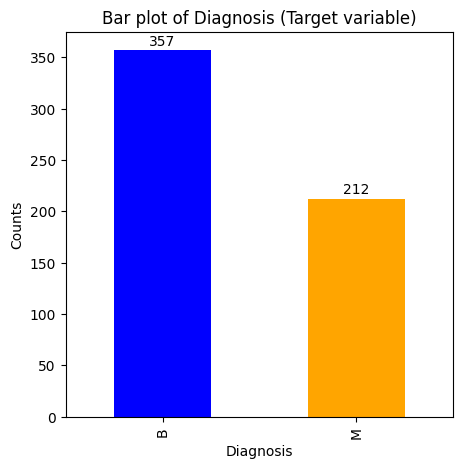

In [4]:
counts = df[target].value_counts()

ax = counts.plot(kind='bar',
            color=['blue', 'orange'],
            figsize=(5,5))

plt.xlabel('Diagnosis')
plt.ylabel('Counts')
plt.title('Bar plot of Diagnosis (Target variable)')

# Adding total counts on top of each bar.
for i, count in enumerate(counts):
    ax.text(i, count + 5, str(count), ha='center')

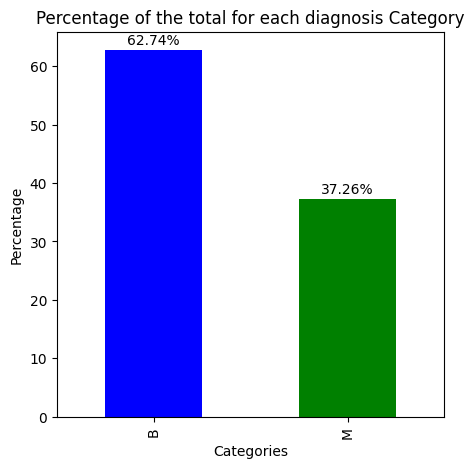

In [5]:
# Calculating percentage of total for each category.
total = counts.sum()
percentage = (counts / total) * 100

# Plotting the bar plot
ax = percentage.plot(kind='bar',
                     color=['blue', 'green'],
                     figsize=(5,5))

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Percentage of the total for each diagnosis Category')

# Adding percentage labels on top of each bar
for i, perc in enumerate(percentage):
    ax.text(i, perc + 1, f'{perc:.2f}%', ha='center')


The target variable is not balanced, although due to the small amount of observations, the assesment of the need to balance it will be done after testing the models performance for the minoritary variable. Models like random forest or gradient boosting could show good enough results to avoid the need of balancing it.

Target variable should be binarized during data preprocessing to allow the use of different models for binary classification.

#### 2. Variables types

In [6]:
# Data Set data types:
dtypes = df.dtypes

for d_type in dtypes.unique():
    print(f'{str(d_type)} :' \
          f'{dtypes[dtypes == d_type].index.tolist()}')

object :['diagnosis']
float64 :['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


All but target variable are continuous numerical variables.

#### 3. Missing Values

In [7]:
# Checking for null values:

null_counts = df.isnull().sum()

for null_count in null_counts.unique():
    print(f'Null count = {null_count} for columns:' \
          f'{dtypes[dtypes == d_type].index.tolist()}')


Null count = 0 for columns:['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


There are no missing values.

#### 4. Descriptive Statistics

In [8]:
df[[var for var in df.columns if var != target]].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Based on the statistics, a notably high maximum value compared to 75% Quartile for almost all variables suggests a potential outliers. Further investigation will be conducted in subsequent steps to confirm and analyze this anomaly.

#### 5. Distributions

Means:

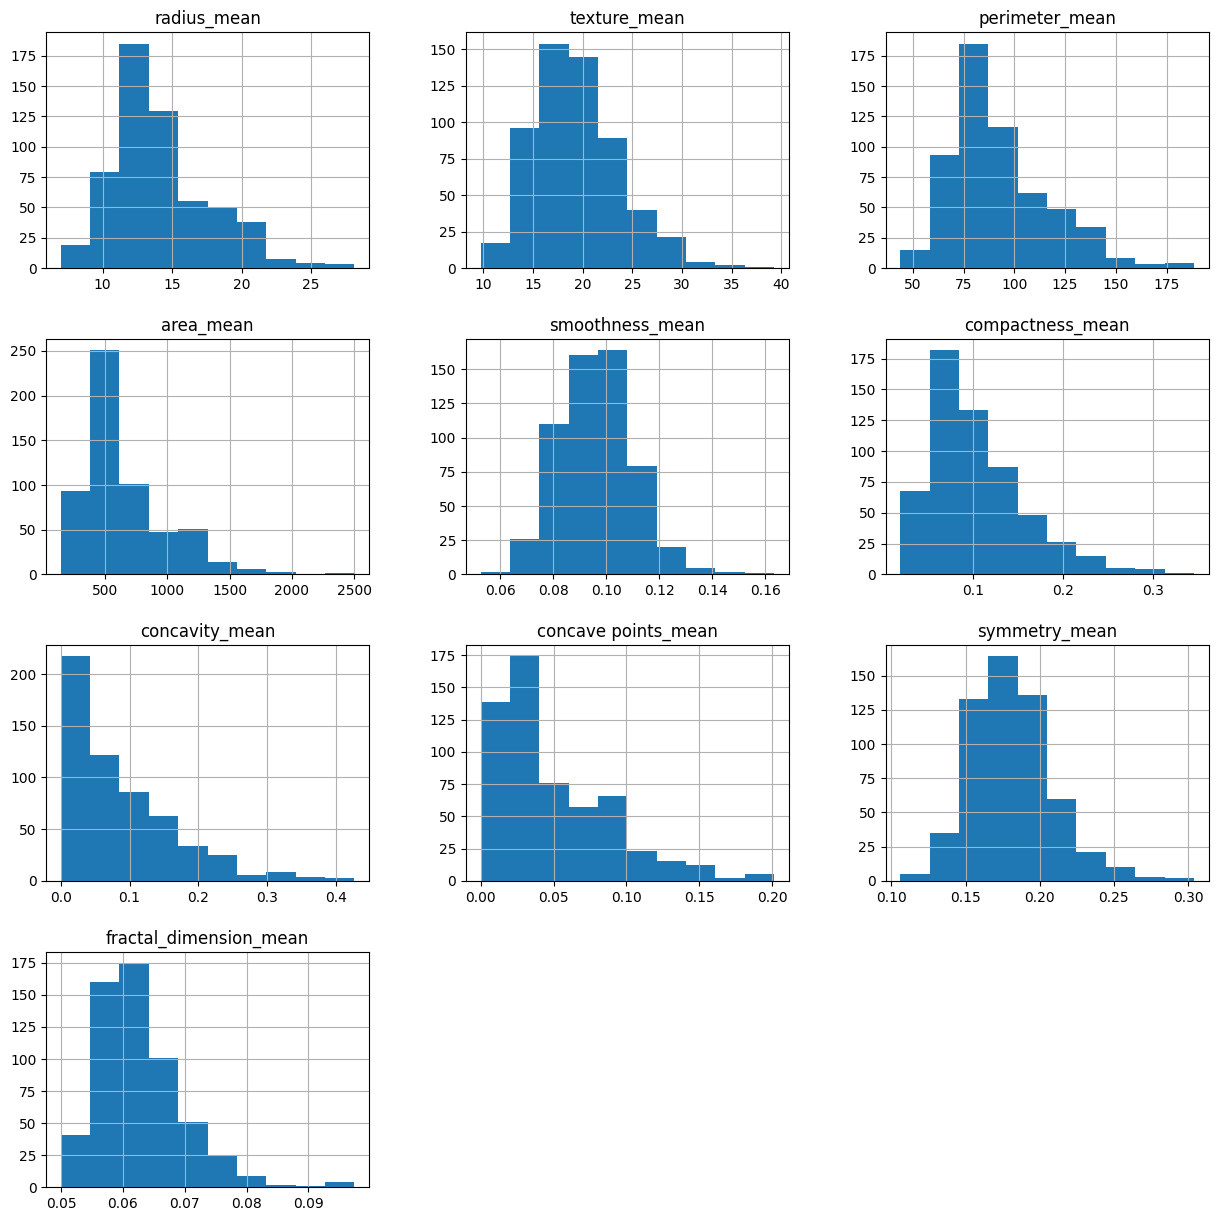

In [9]:
mean_vars = [var for var in df.columns if var.endswith('_mean')]

df[mean_vars].hist(figsize=(15,15))
plt.show()

Standard Error:

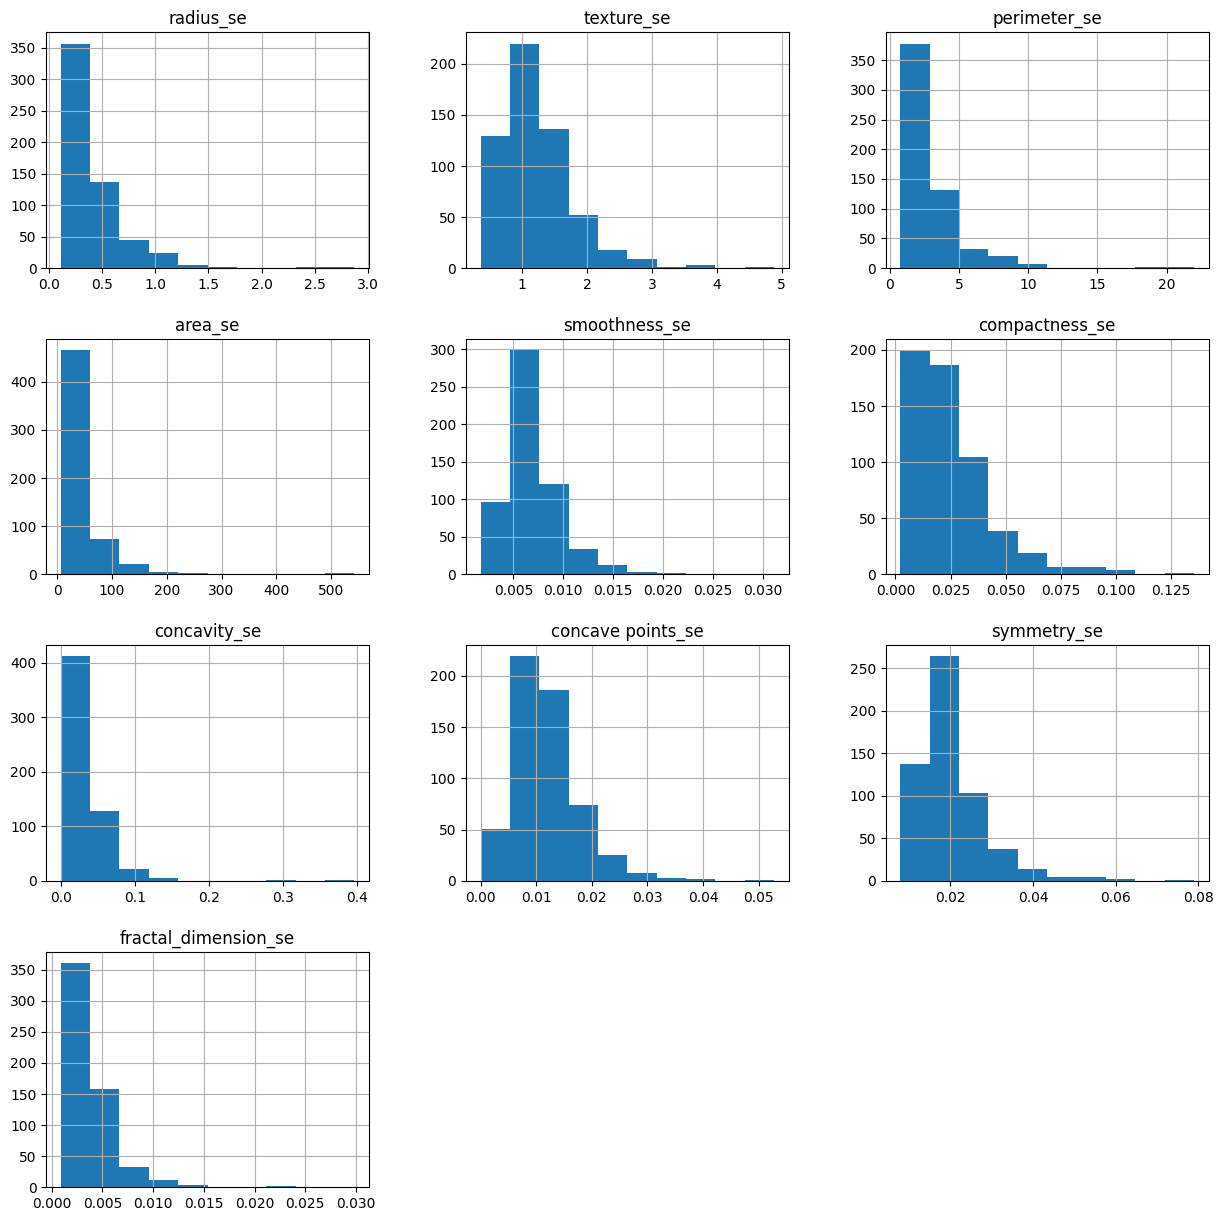

In [10]:
se_vars = [var for var in df.columns if var.endswith('_se')]

df[se_vars].hist(figsize=(15,15))
plt.show()

Worst:

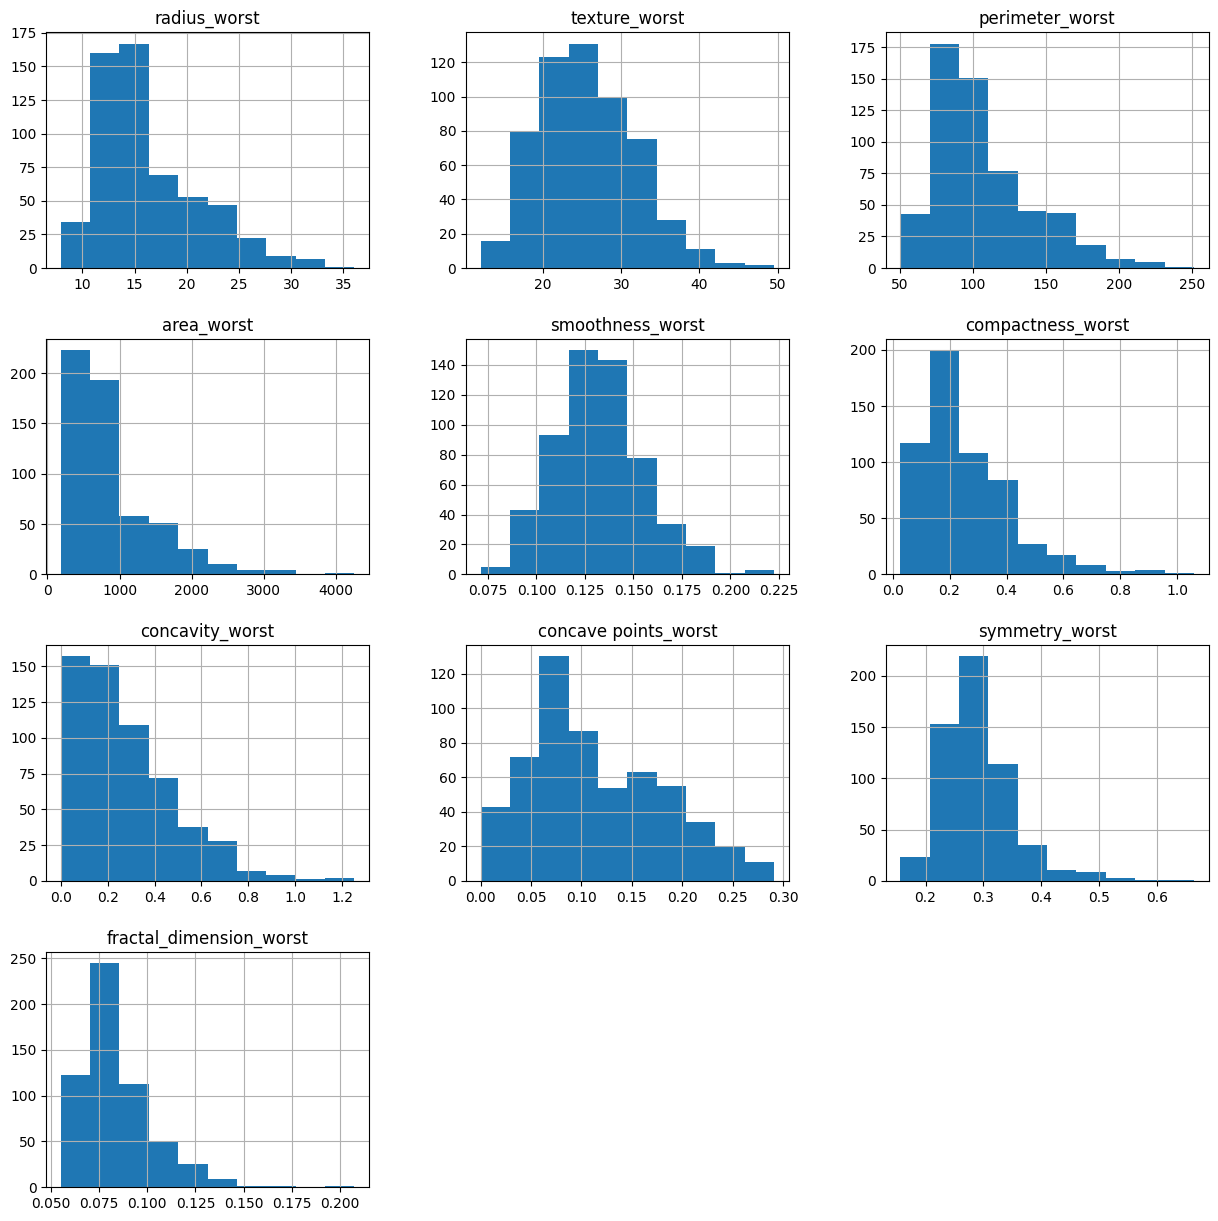

In [11]:
worst_vars = [var for var in df.columns if var.endswith('_worst')]

df[worst_vars].hist(figsize=(15,15))
plt.show()

Specially in SE and WORST variables, it can be observed the presence of outliers at their maximum value.

It can be observed that in almost all cases, numerical variables distributions do not follow a normal distribution. And there is a need to scale them in the same range to improve the performance of many ML models.

Having continuous features with values evenly distributed, sometimes relates to an improvement in model's predictive power. To determine if the transformations improve the outputs of the model, a model without these transformations should be trained and compared to a model trained when values are transformed. 

#### 6. Outliers Detection:

Dealing with extreme outliers before transforming the variables can help stabilize the variance of the data and ensure that transformations are applied more evenly across the range of values. Since this project deals with medical data, outliers require a careful consideration due to the potential impact on the analysis and interpretation of results. For this reason, to avoid removing relevant information, only extreme values will been addressed. 

Let's observe the relationship between pairs of variables. The goal is to locate possible extreme outliers by looking into data points that are located far away from the main cluster of points.

Create scatterplots to explore the relationships between pairs of continuous numeric variables. You can color or shape the points based on the target variable to visualize any patterns or clusters.

Identify outliers in the continuous numeric variables and consider their impact on the analysis. You can use statistical methods, such as z-scores or interquartile range (IQR), or visualization techniques like scatterplots or boxplots to detect outliers.

#### 7. Transformations:

After dealing with extreme outliers. Let's try to transform the variables to have better distributions as it was identified that most of them do not follow a normal distribution.

In [12]:
# Get column names with values equal to 0.
zero_columns = df.columns[(df == 0).any()]

print(f"Column names with values equal to 0: {zero_columns}")

nonzero_columns = [col_name for col_name in df.columns \
                    if not col_name in zero_columns and col_name != target]

print(f"Remaining column names: {nonzero_columns}")

Column names with values equal to 0: Index(['concavity_mean', 'concave points_mean', 'concavity_se',
       'concave points_se', 'concavity_worst', 'concave points_worst'],
      dtype='object')
Remaining column names: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst']


Logarithmic transformation cannot be applied to columns with the value 0.

**Logarithmic transformation**: 

In [13]:
tmp = df.copy()

for var in nonzero_columns:
    tmp[var] = np.log(df[var])


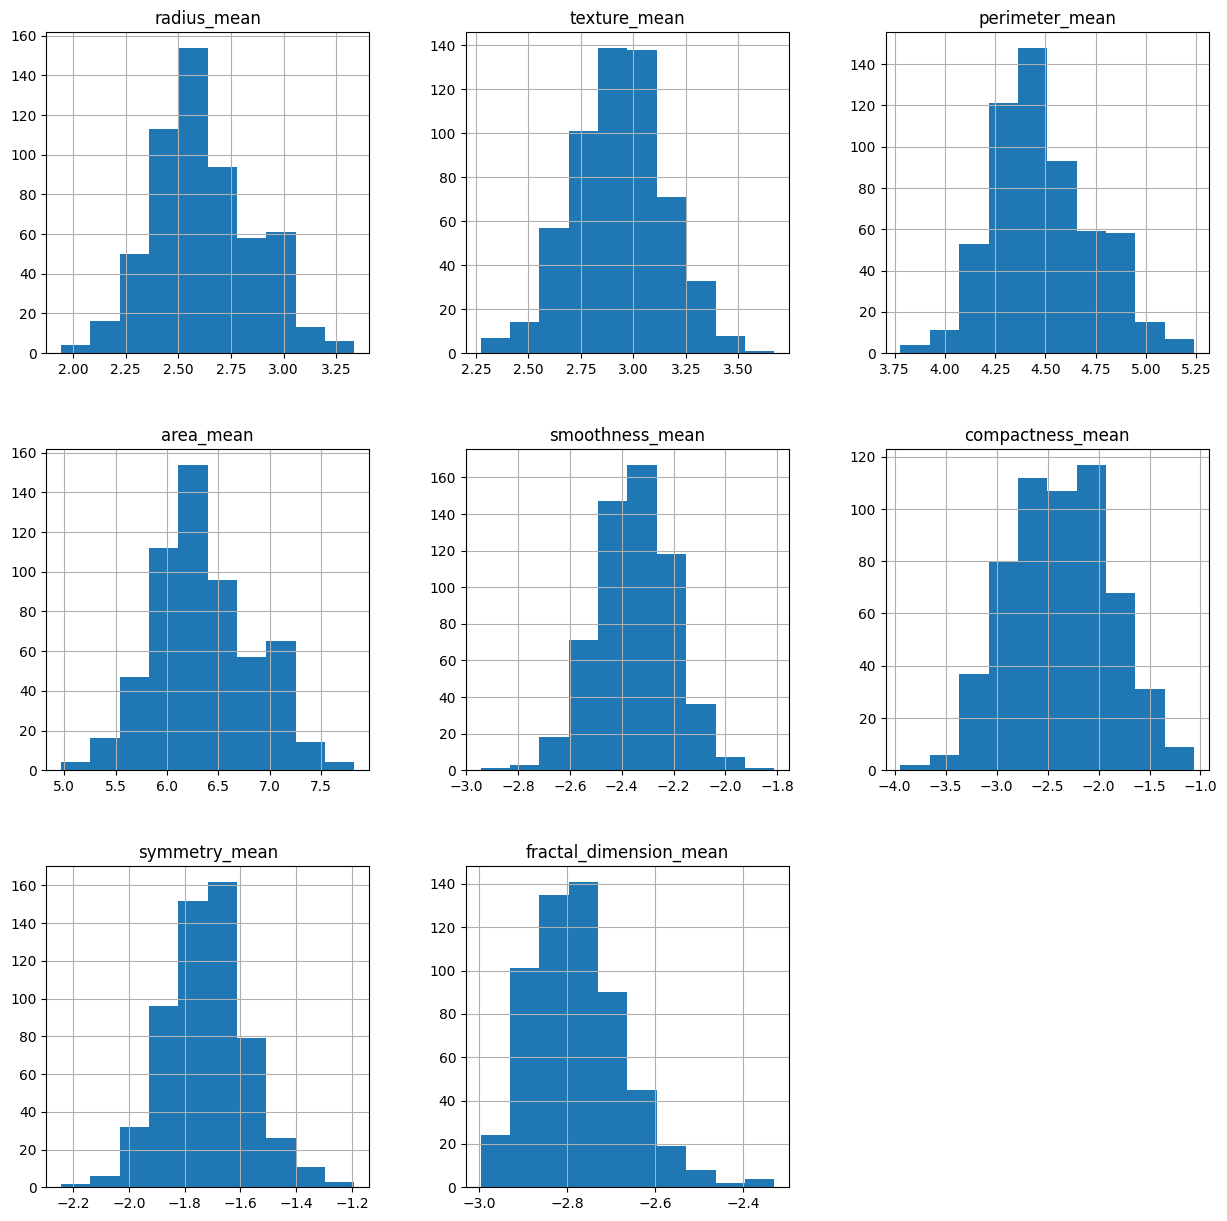

In [14]:
tmp[[col for col in nonzero_columns \
     if col.endswith('_mean')]].hist(figsize=(15,15))
plt.show()

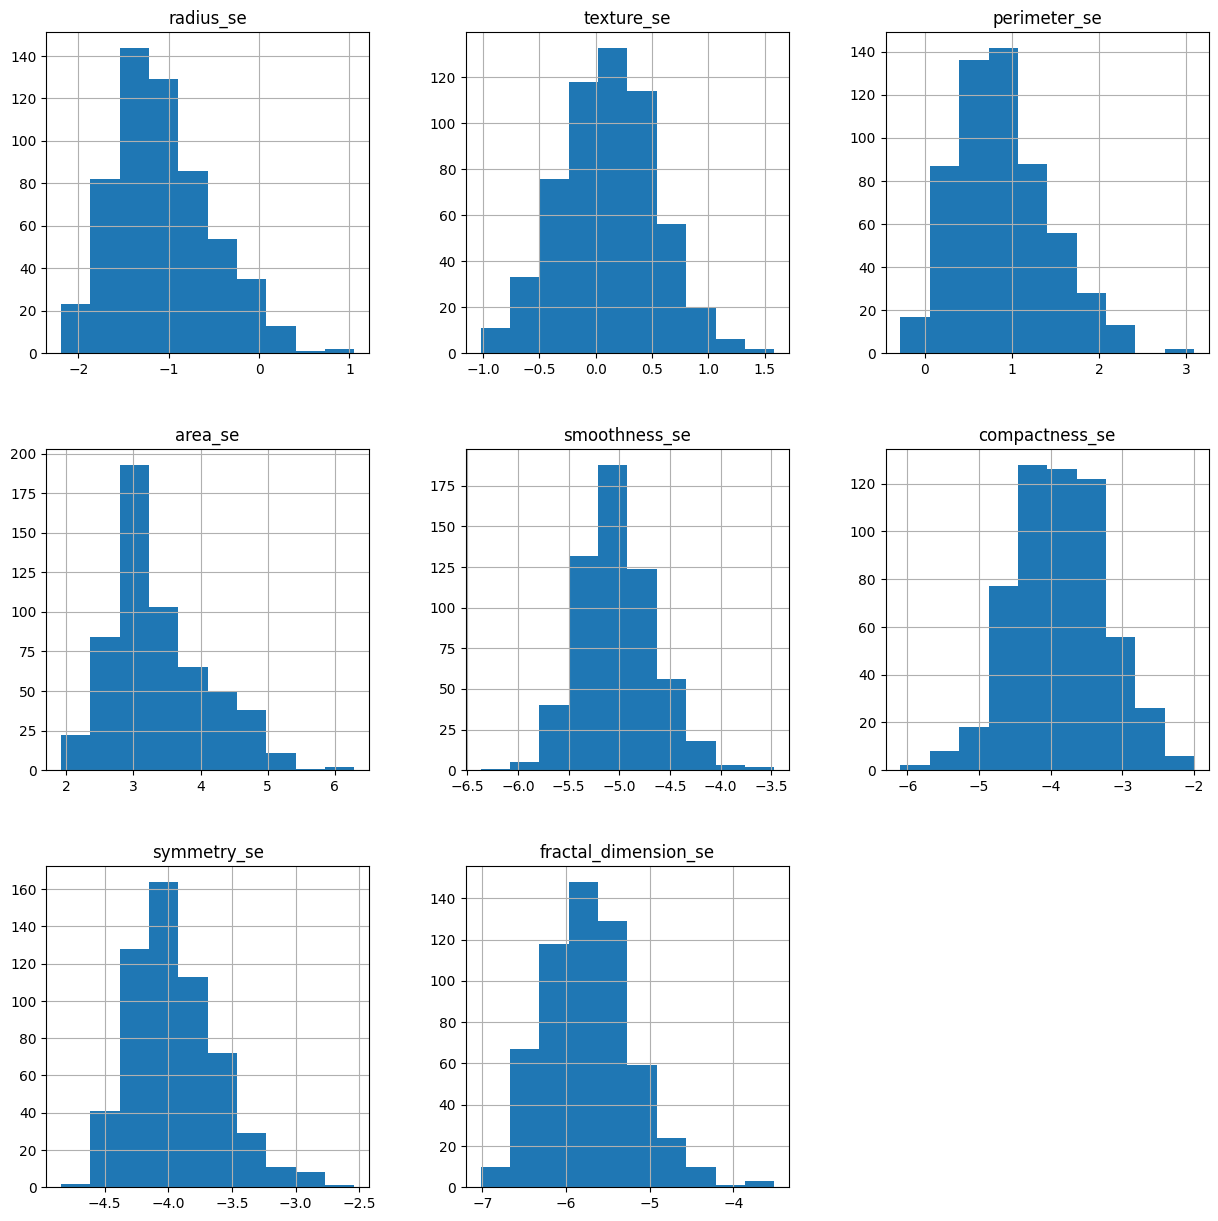

In [15]:
tmp[[col for col in nonzero_columns \
     if col.endswith('_se')]].hist(figsize=(15,15))
plt.show()

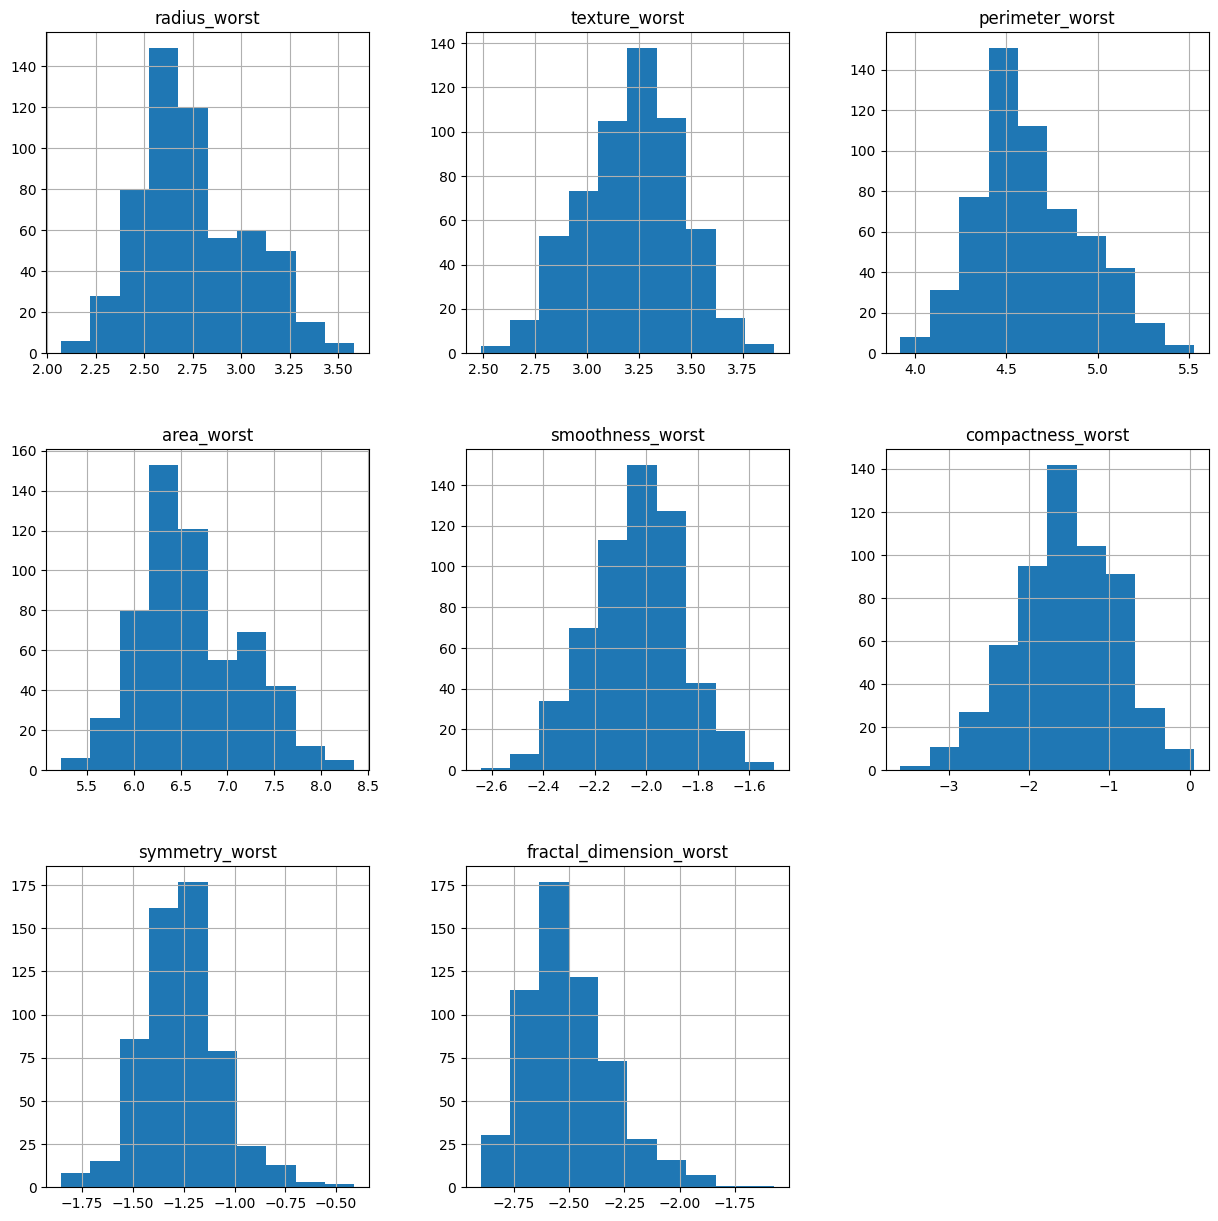

In [16]:
tmp[[col for col in nonzero_columns \
     if col.endswith('_worst')]].hist(figsize=(15,15))
plt.show()

Let's try to improve the distribution for variables that have 0s by applying an small offset followed by the log transform. 

In [17]:
z_tmp = df.copy()

z_tmp[zero_columns] = df[zero_columns] + 0.0001

In [18]:
for var in zero_columns:
    tmp[var] = np.log(z_tmp[var])

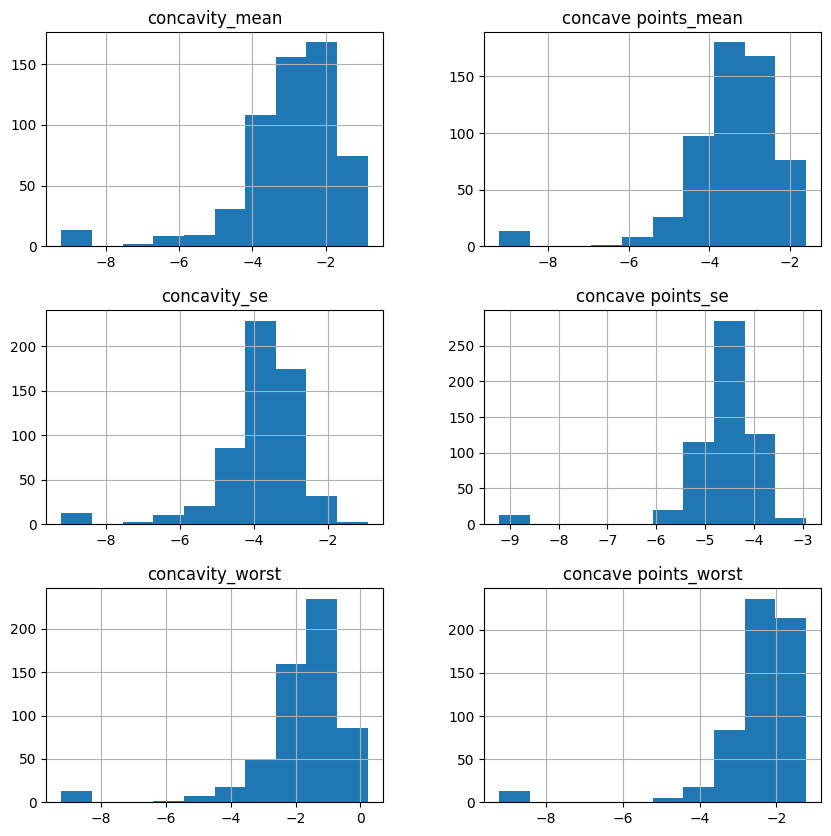

In [19]:
tmp[zero_columns].hist(figsize=(10,10))
plt.show()

Distributions do not improve much for values that originally contain zero values when applying a logarithmic transformation.

**Square Root Transformation:**

Let's try with a square root transformation for those variables that originally contained zero values. This transformation sometimes works better for more skeweed variables. 

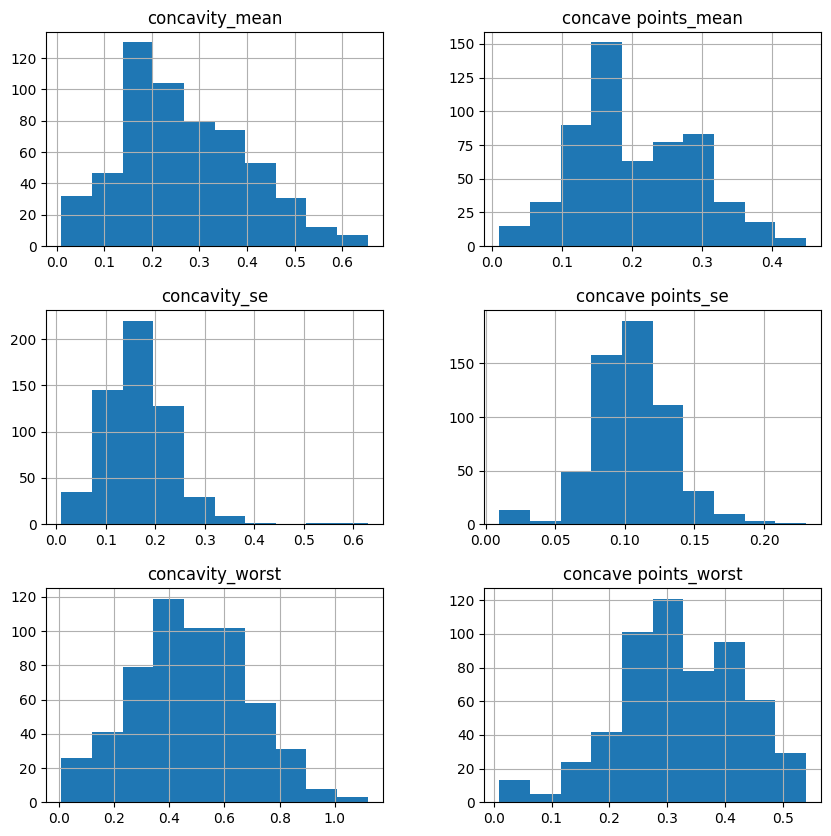

In [20]:
for var in zero_columns:
    tmp[var] = z_tmp[var].apply(lambda x: x** 0.5)

tmp[zero_columns].hist(figsize=(10,10))
plt.show()

Now distributions are more normal.

**Visual exploration of how transforming the variables might affect the predictive power of our models:**

In [21]:
def plot_target_effect_origi_vs_trans(var):

    _, axes = plt.subplots(1, 2, figsize=(8, 4))\
    
    # Flattening the array to make it easier to iterate. 
    sns.boxplot(x=target, y=var, data=df, ax=axes[0])
    axes[0].set_title(f'Boxplot of Original Variable {var} vs. {target}',
                      fontsize=8)
    axes[0].set_xlabel(f'{target}')
    axes[0].set_ylabel(f'{var}')
    sns.boxplot(x=target, y=var, data=tmp, ax=axes[1])
    axes[1].set_title(f'Boxplot of Transformed Variable {var} vs. {target}',
                      fontsize=8)
    axes[1].set_xlabel(f'{target}')
    axes[1].set_ylabel(f'{var}')

    plt.tight_layout()
    plt.show()

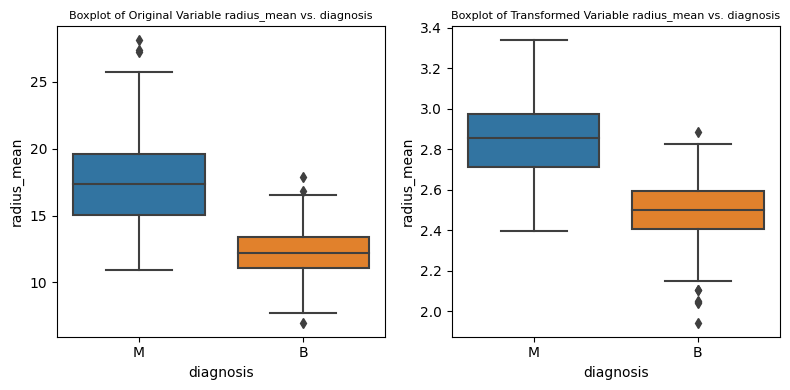

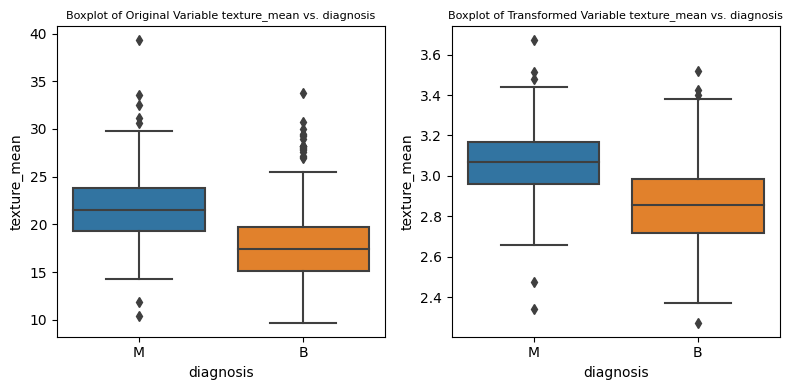

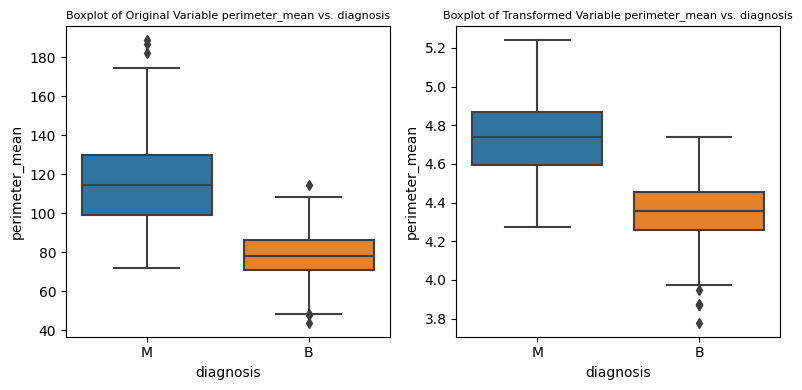

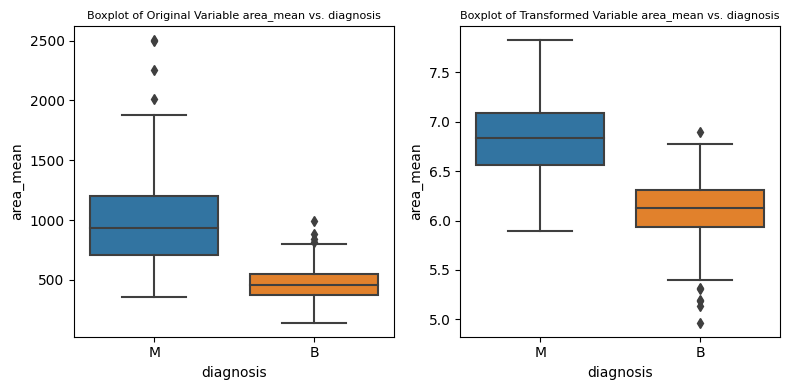

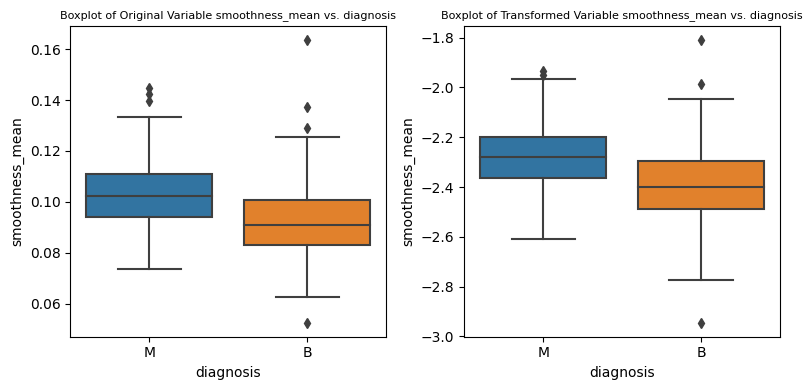

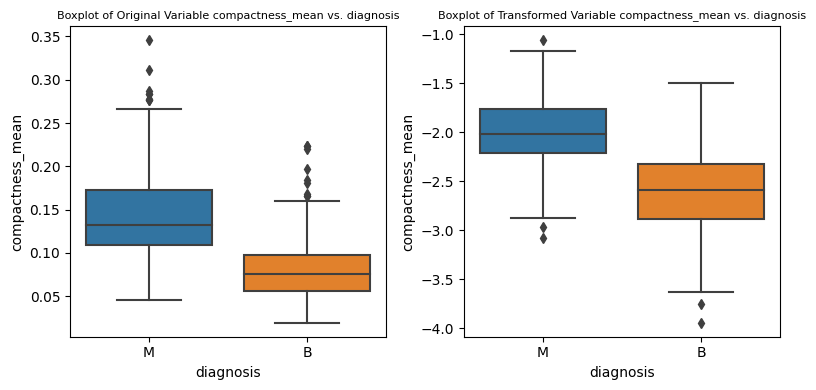

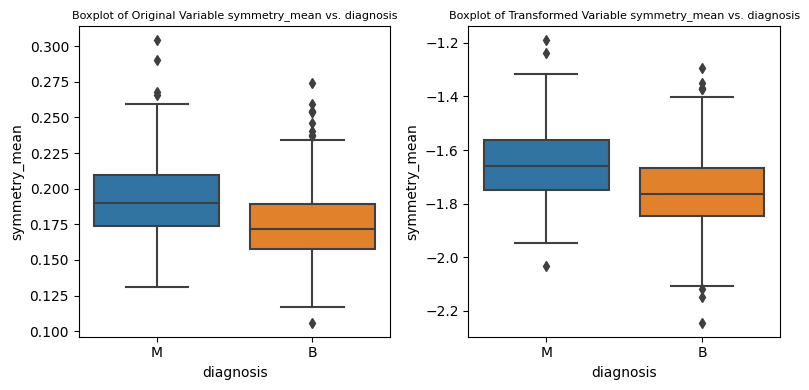

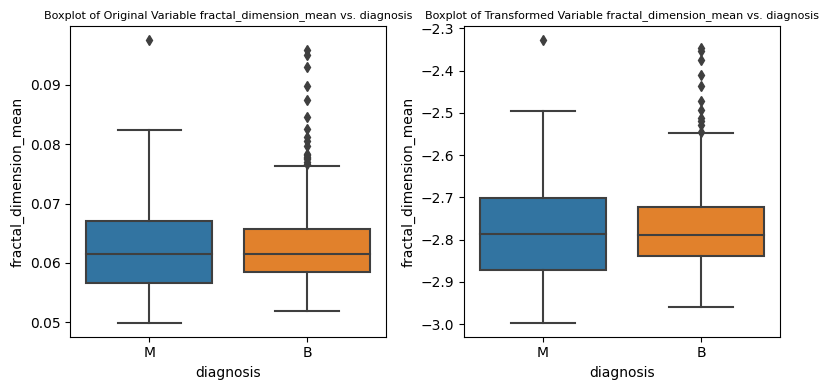

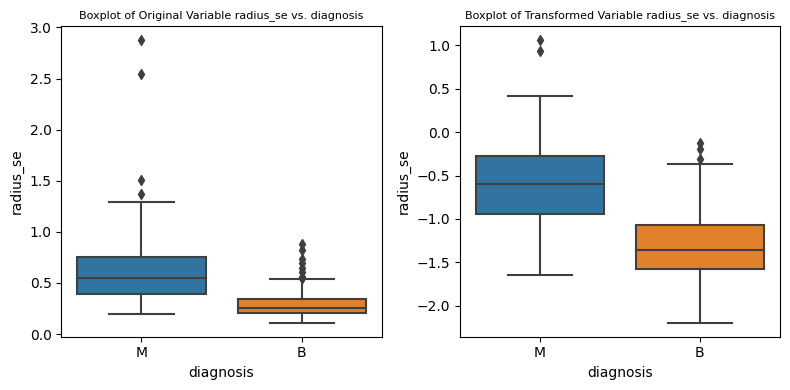

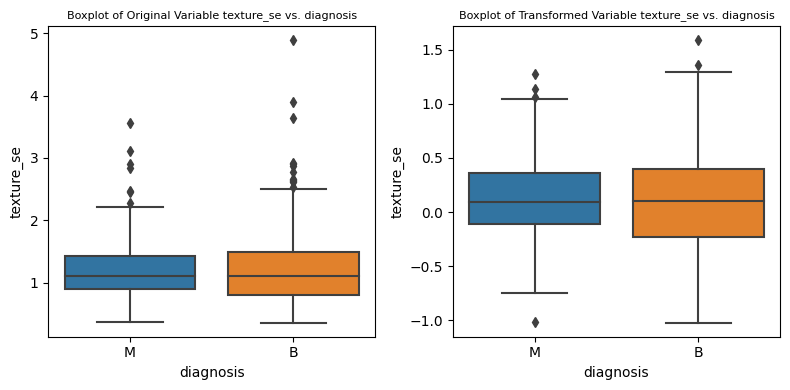

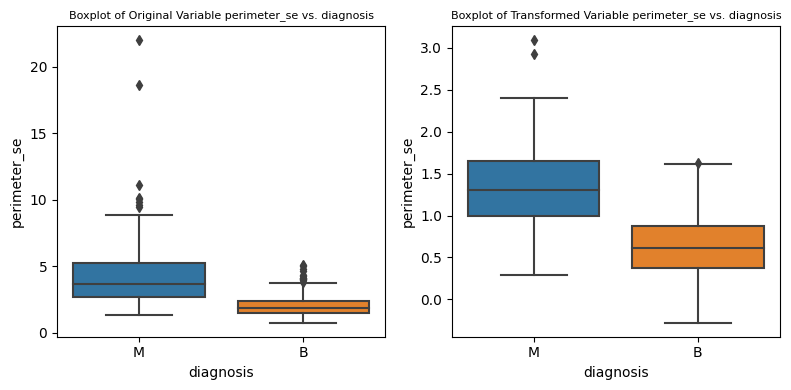

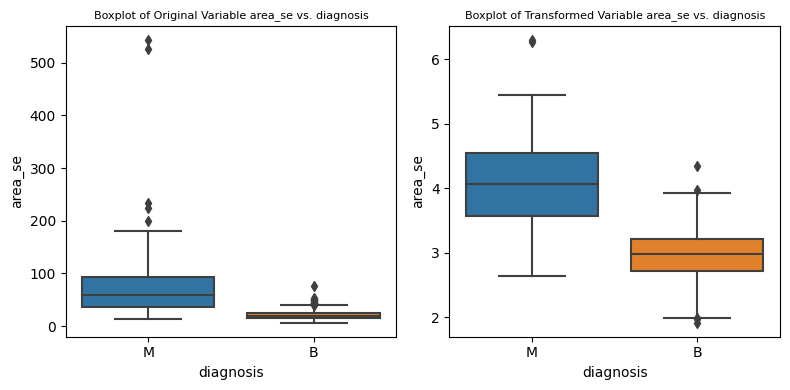

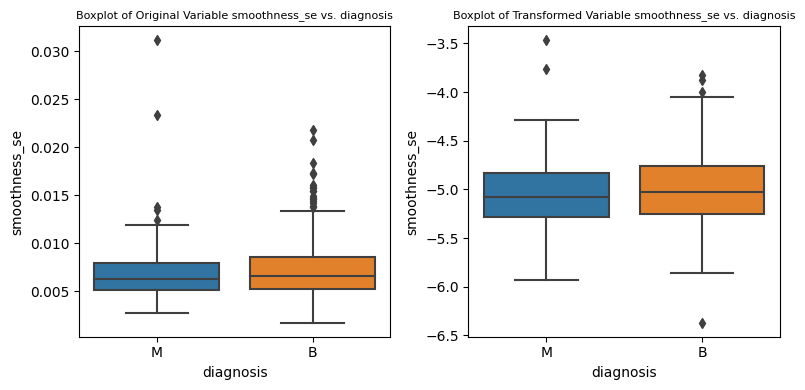

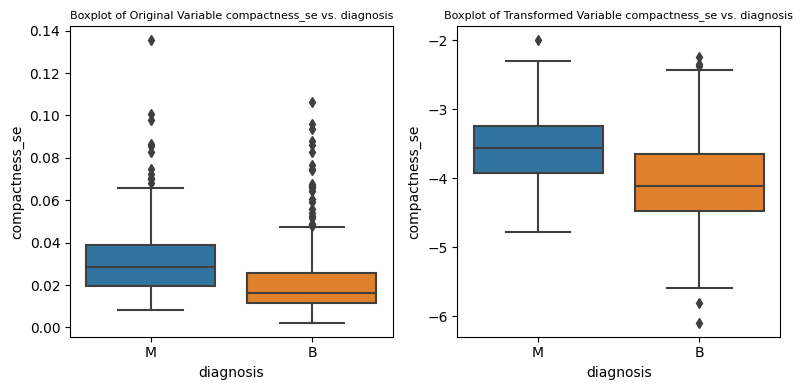

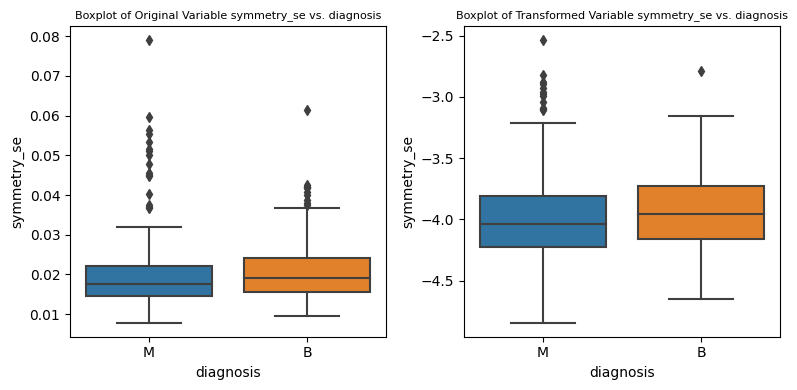

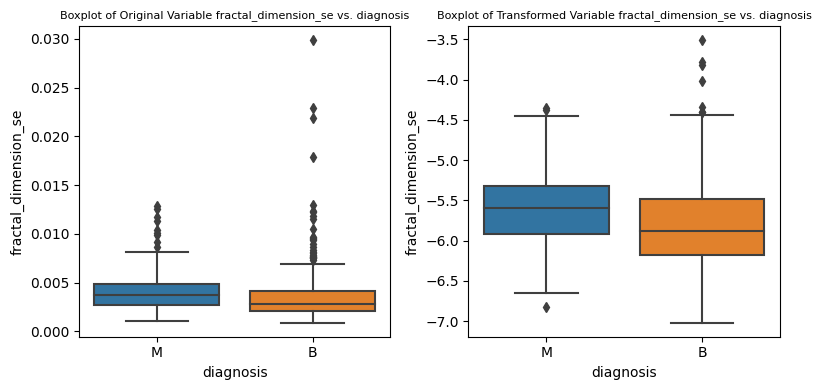

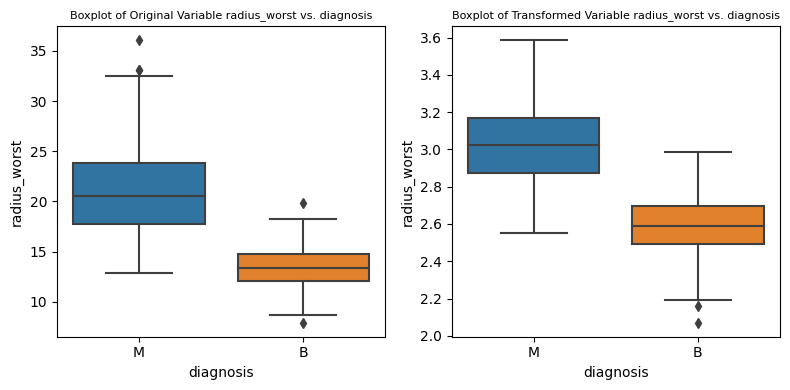

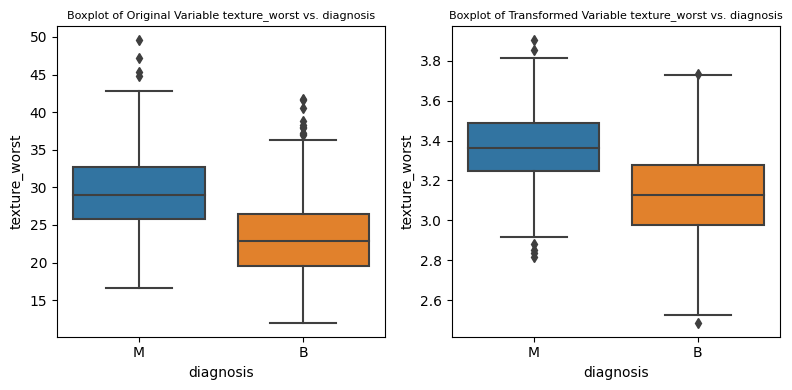

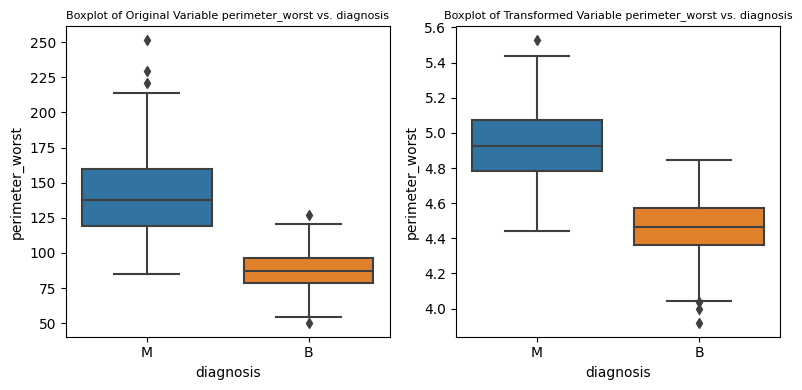

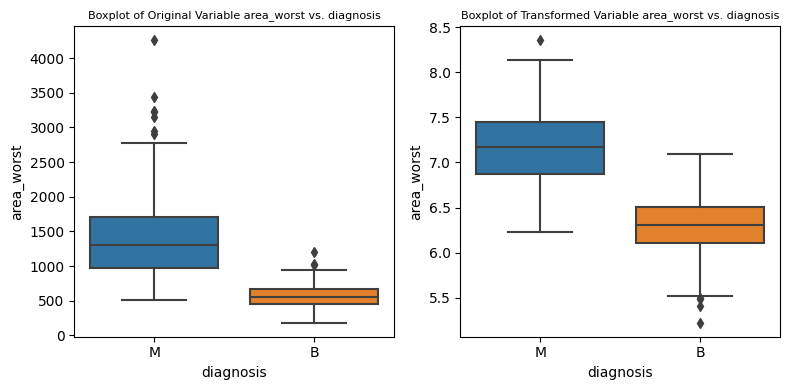

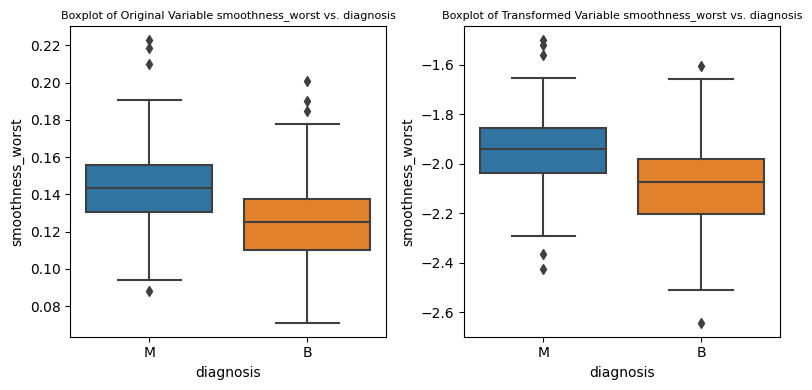

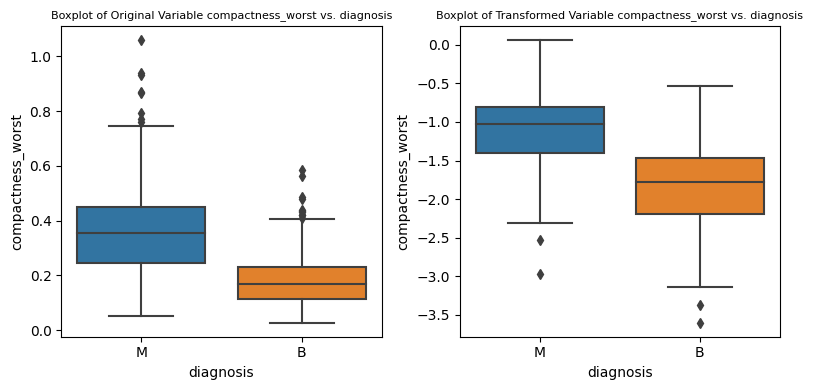

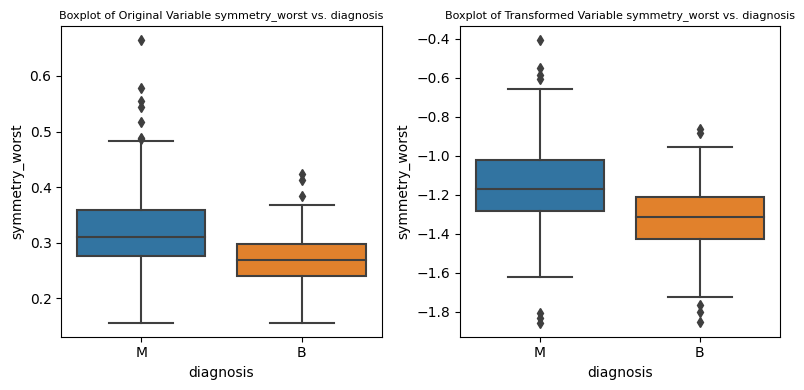

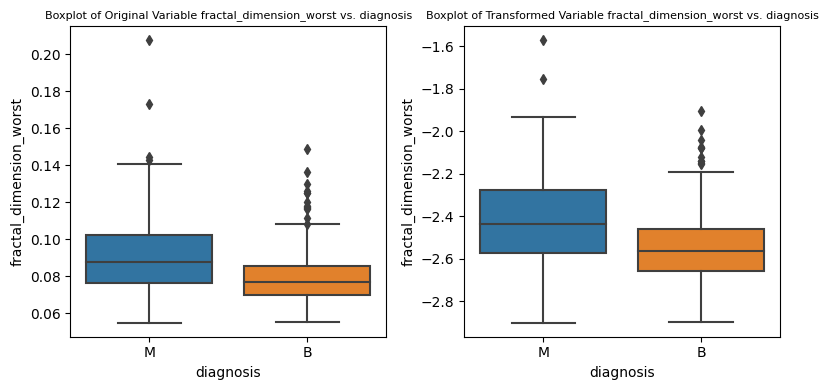

In [22]:
for var in nonzero_columns:
    plot_target_effect_origi_vs_trans(var)

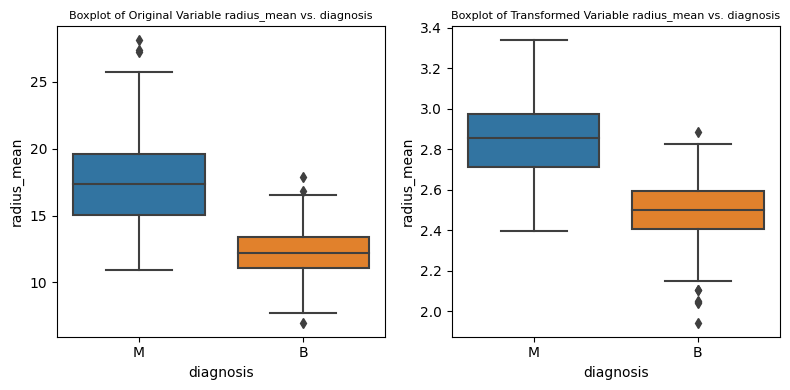

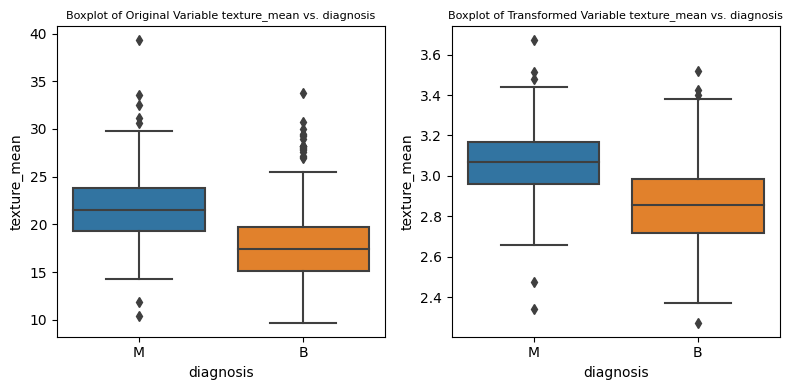

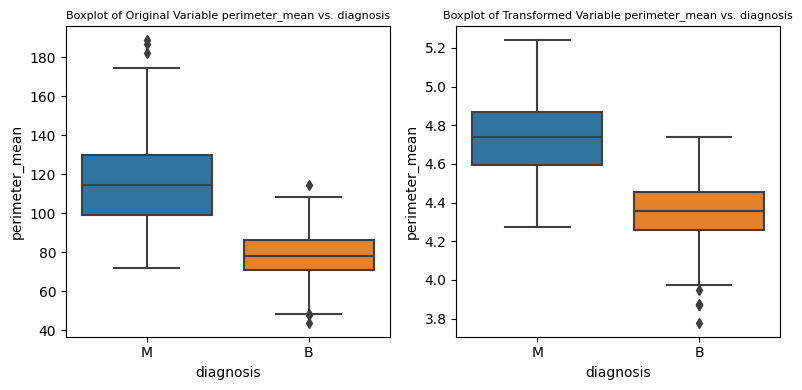

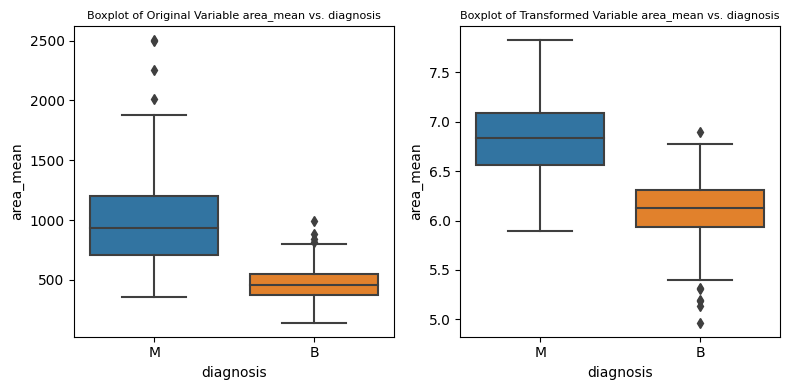

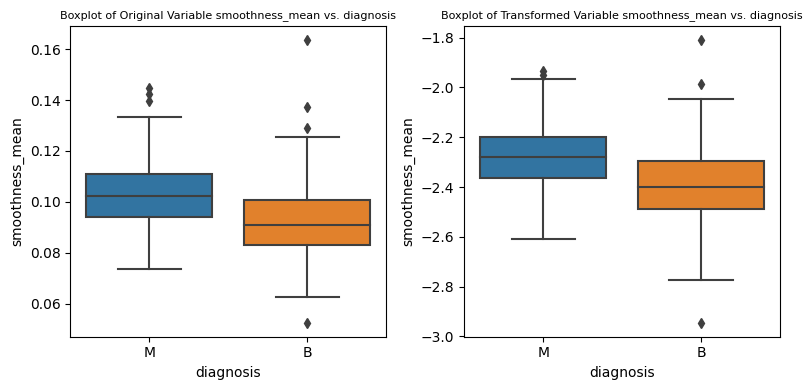

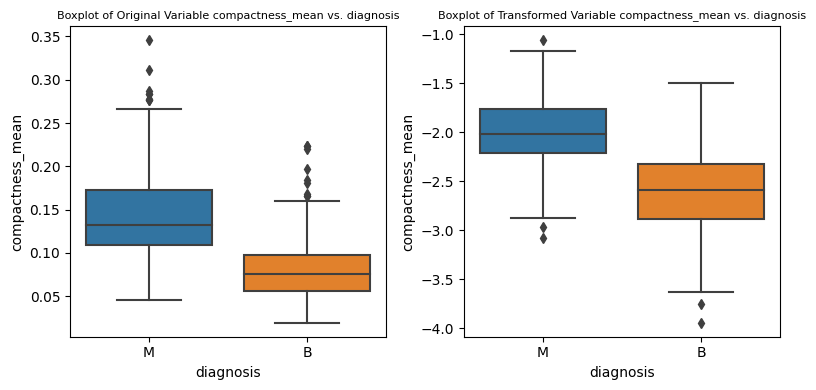

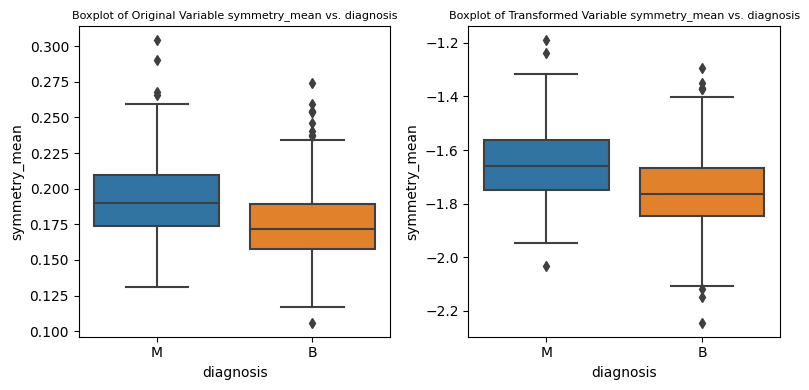

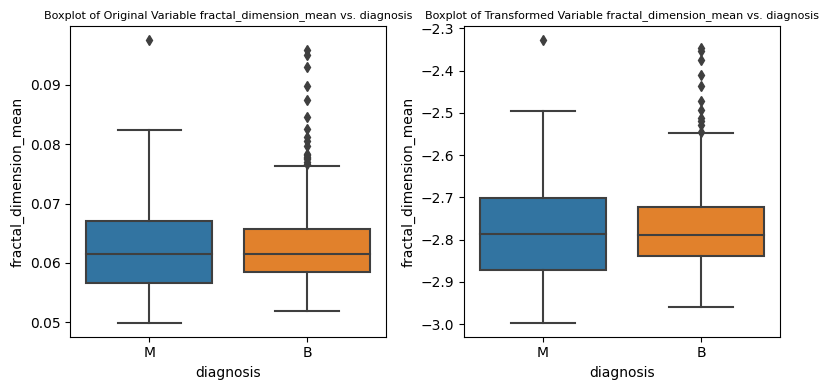

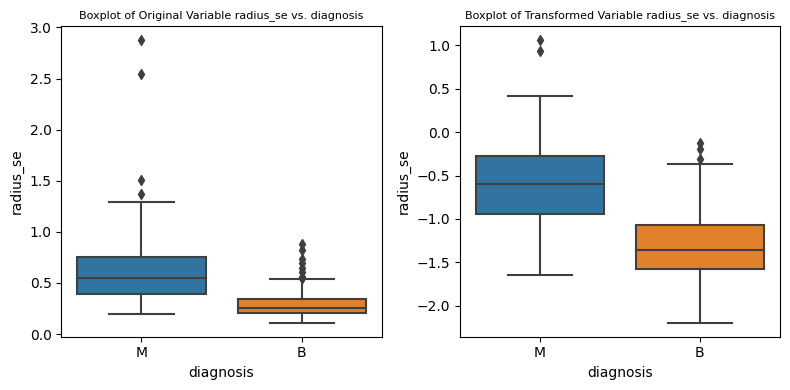

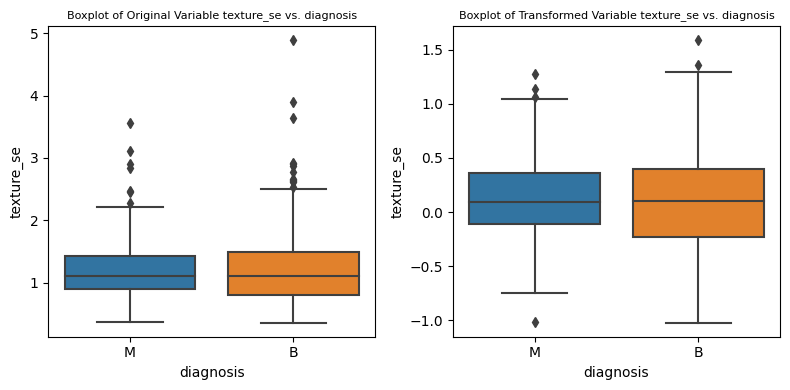

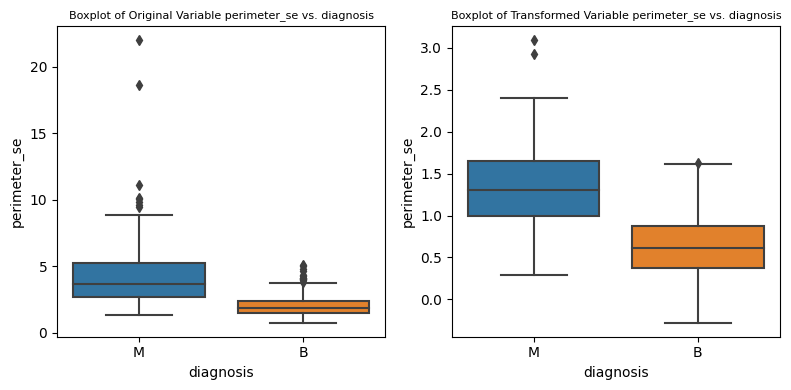

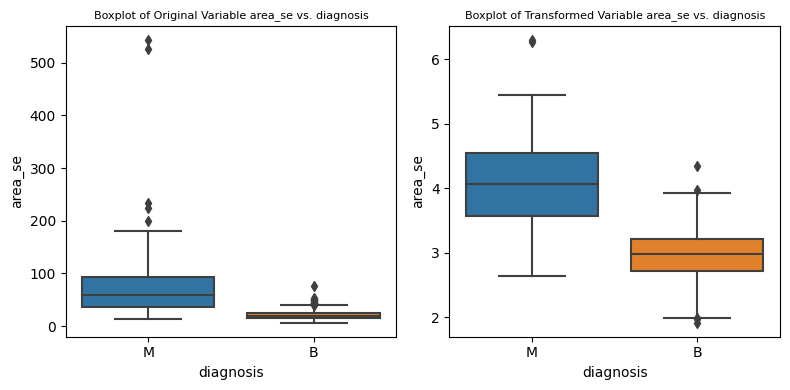

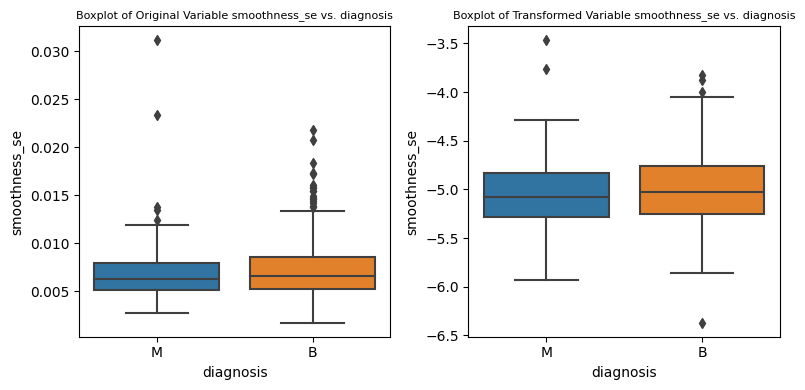

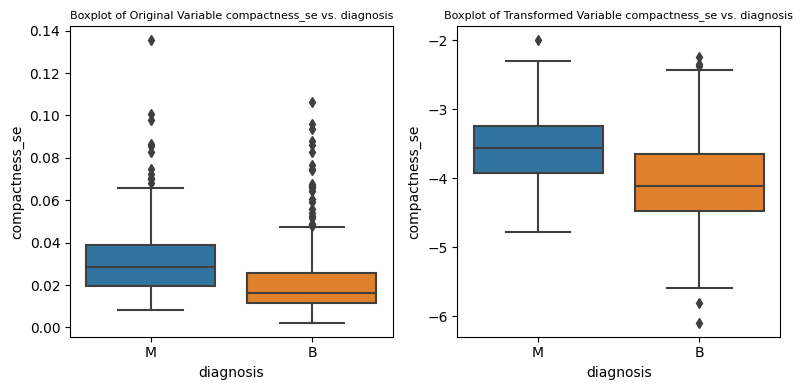

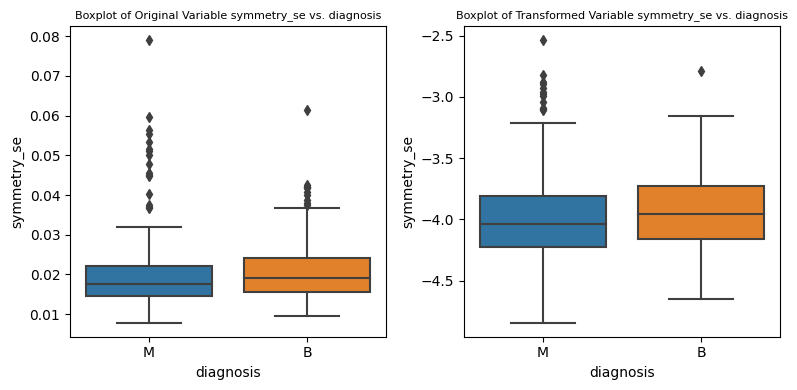

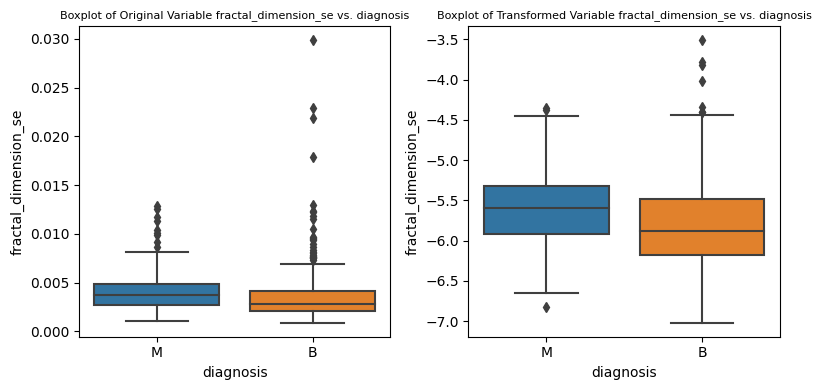

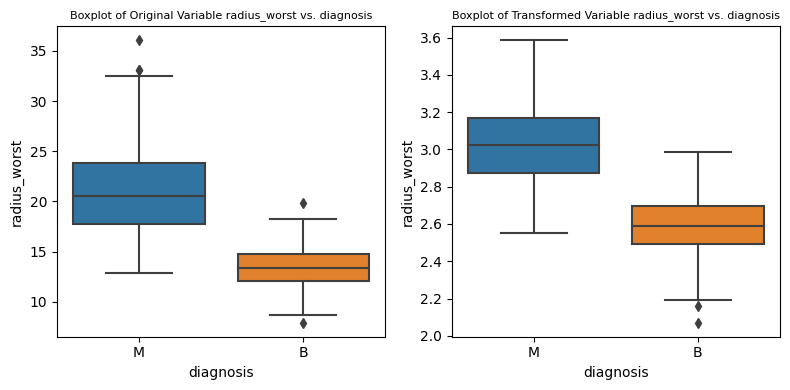

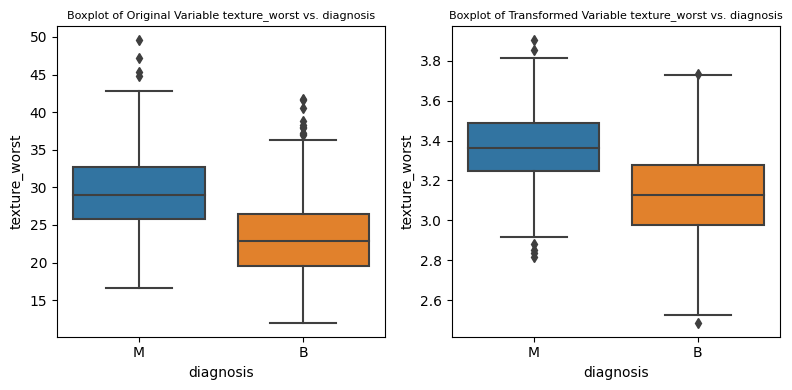

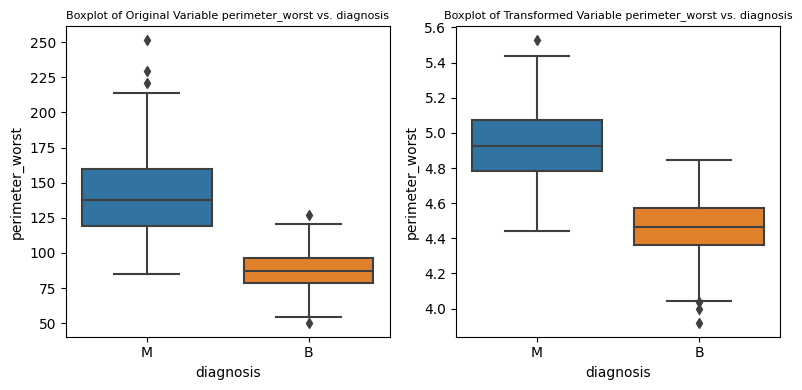

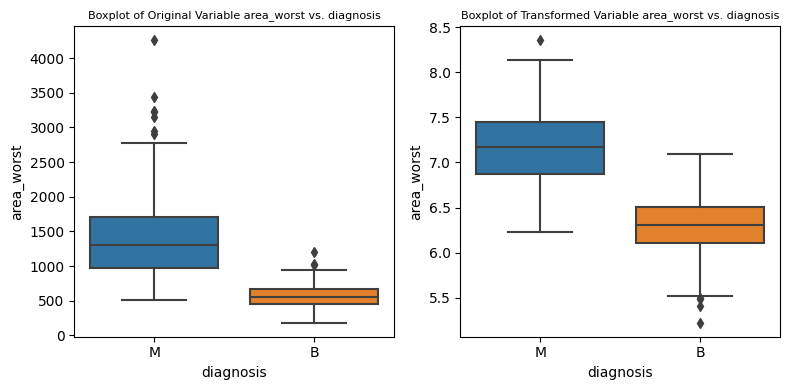

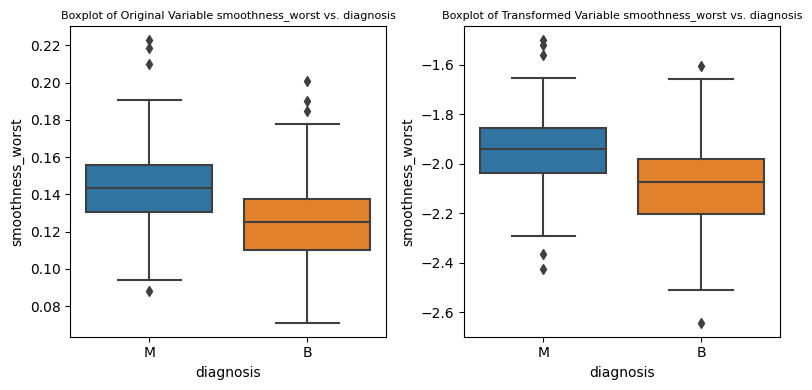

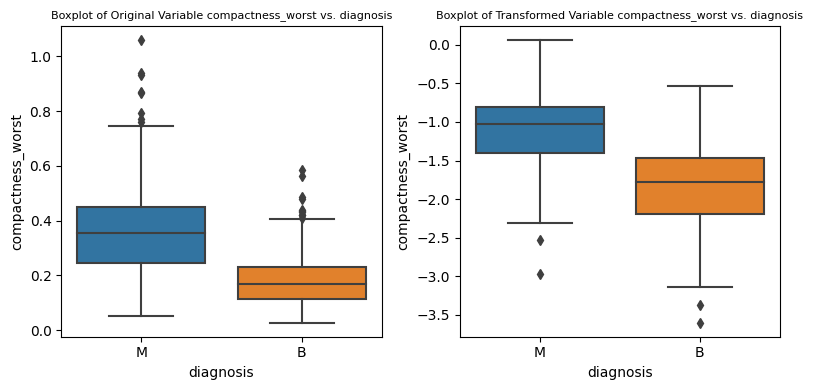

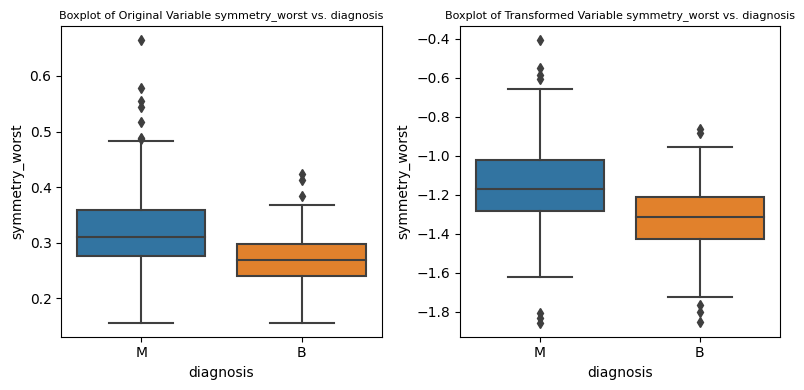

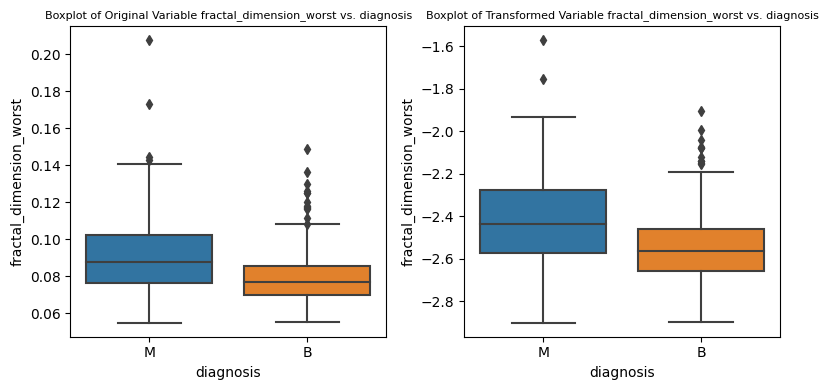

In [23]:
for var in nonzero_columns:
    plot_target_effect_origi_vs_trans(var)

It can be observed that transforming variables either does not affect much the resulting distribution of the variable based on target value, or the difference between distributions based on target value increases, like with *area_se*. Therefore, it is likely that for this last case, applying the transformation on those variables will help improve the predictive power of our models.
From this plots it can also be concluded that some variables might not be very relevant since the distribution of the variable based on the target value is very similar, like *fractal_dimension_mean* or *symetry_se*. 

Using box-plot representations. It can be observed the presence of possible outliers for most variables. It can be also seen that applying transformations reduce the presence of them. Since we are talking about medical data, outliers require a careful consideration due to the potential impact on the analysis and interpretation of results for this reason, to avoid removing relevant information, only extreme values have been addressed. 

#### 8. Correlation Analysis

In [26]:
sns.pairplot(tmp[zero_columns], palette= 'Set1')
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001252A4D9310> (for post_execute):


KeyboardInterrupt: 

Correlation Analysis:

    Examine the correlation between continuous numeric variables using correlation matrices or heatmaps. This will help identify multicollinearity between features and potential relationships with the target variable.